# Tick Strategy
### Team: Blue Horseshoe

In [352]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load our helper functios
import simtools as st
import tick as tk
from getstock import *
from simtools import *

matplotlib.rcParams[ 'figure.figsize' ] = ( 16, 9 )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0. Load TAQ Data

We'll assume we have already done some cleaning by using our Tick Data Setup or similar code

In [221]:
# set up some variables
# NOTE: tickfile is a merged TAQ file!!!

tickfile = 'TSLA-TAQ-Sep03.zip'

taq = pd.read_pickle(tickfile)

In [309]:
# filter on date
# test_day = '08/02/19'
# day = taq[test_day]


taq.iloc[:30000]


,exch,bid_px,bid_size,ask_px,ask_size,qu_cond,qu_seqnum,natbbo_ind,qu_cancel,qu_source,symbol,suffix_x,suffix_y,trade_size,trade_px
2019-09-03 09:30:00.047754421,C,223.16,2.0,225.17,2.0,R,1139842.0,0.0,NaN,N,TSLA,NaN,NaN,NaN,NaN
2019-09-03 09:30:00.101167900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TSLA,NaN,NaN,4.0,224.08
2019-09-03 09:30:00.101220929,X,211.66,1.0,224.35,1.0,R,1141112.0,2.0,NaN,N,TSLA,NaN,NaN,NaN,NaN
2019-09-03 09:30:00.101296213,B,222.66,3.0,225.09,3.0,R,1141120.0,0.0,NaN,N,TSLA,NaN,NaN,NaN,NaN
2019-09-03 09:30:00.101477420,X,212.47,1.0,224.35,1.0,R,1141126.0,0.0,NaN,N,TSLA,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03 09:42:06.646042118,Q,226.15,1.0,226.45,1.0,R,3512292.0,0.0,NaN,N,TSLA,NaN,NaN,NaN,NaN
2019-09-03 09:42:06.646124671,P,225.33,1.0,226.50,1.0,R,3512293.0,0.0,NaN,N,TSLA,NaN,NaN,NaN,NaN
2019-09-03 09:42:06.646141626,P,226.01,1.0,226.50,1.0,R,3512294.0,0.0,NaN,N,TSLA,NaN,NaN,NaN,NaN
2019-09-03 09:42:06.646171507,Z,226.13,4.0,226.28,3.0,R,3512295.0,2.0,NaN,N,TSLA,NaN,NaN,NaN,NaN


## 1. Implement the Tick Strategy

In [323]:
results = tk.algo_loop( taq.iloc[:100000] )

2019-10-31 01:01:32:201370: Beginning Tick Strategy run
Average stock spread for sample: 1.2193
2019-10-31 01:01:32:303137: starting main loop
2019-10-31 01:03:20:301630: end simulation loop
2019-10-31 01:03:20:301801: order analytics
2019-10-31 01:03:20:338694: Algo run complete.


In [337]:
results

,tick,risk,fair_value,market_price,trade_price,avg_price,position,unrealized_pnl,realized_pnl,trade_shares,trade_type,trade_side
2019-09-03 09:30:01.063247262,-1,0,223.972,224.05,224,224,-1,0,0,1,Agg,s
2019-09-03 09:30:01.823003996,-1,0,224.096,224,224,224,0,-0,0,1,Pas,b
2019-09-03 09:30:02.140420818,1,0,224.315,224.28,224.3,224.3,1,0,0,1,Agg,b
2019-09-03 09:30:02.306131843,-1,0,223.965,224,224,224.3,0,-0.3,-0.3,1,Agg,s
2019-09-03 09:30:02.306257436,-1,0,223.868,224,224,224,1,0,-0.3,1,Pas,b
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03 10:24:16.588044857,-1,0,226.208,226.49,226.49,226.343,-180,-26.5334,112.647,1,Agg,s
2019-09-03 10:24:16.588417221,-1,0,226.153,226.47,226.49,226.343,-181,-22.9334,112.647,1,Agg,s
2019-09-03 10:24:16.589011048,-1,0,226.071,226.46,226.49,226.344,-182,-21.1034,112.647,1,Agg,s
2019-09-03 10:24:16.590415434,-1,0,226.055,226.43,226.49,226.345,-183,-15.6134,112.647,1,Agg,s


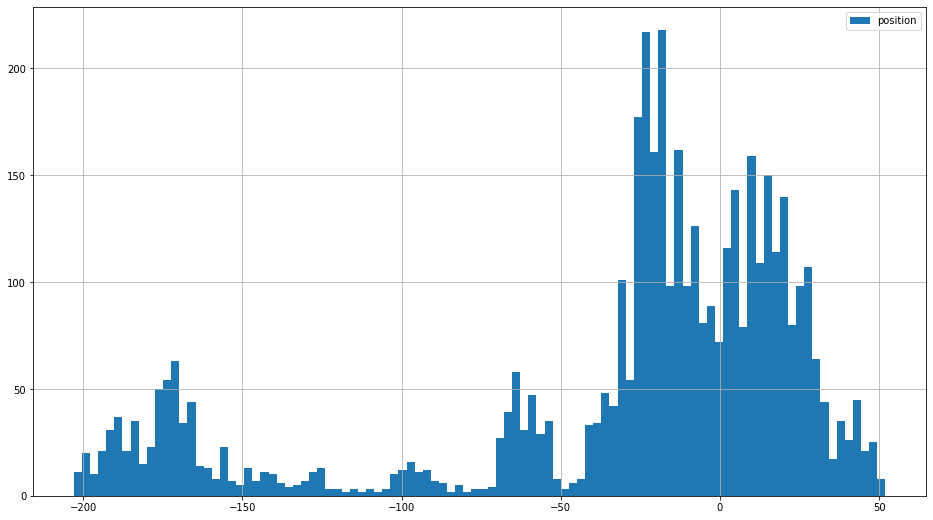

In [325]:
#results['market_price'].plot(label='market price')
#results['trade_price'].plot(label='trade price')
#results['avg_price'].plot(label='avg price')
results['position'].hist(bins=100, label='position')
plt.legend()
plt.show()

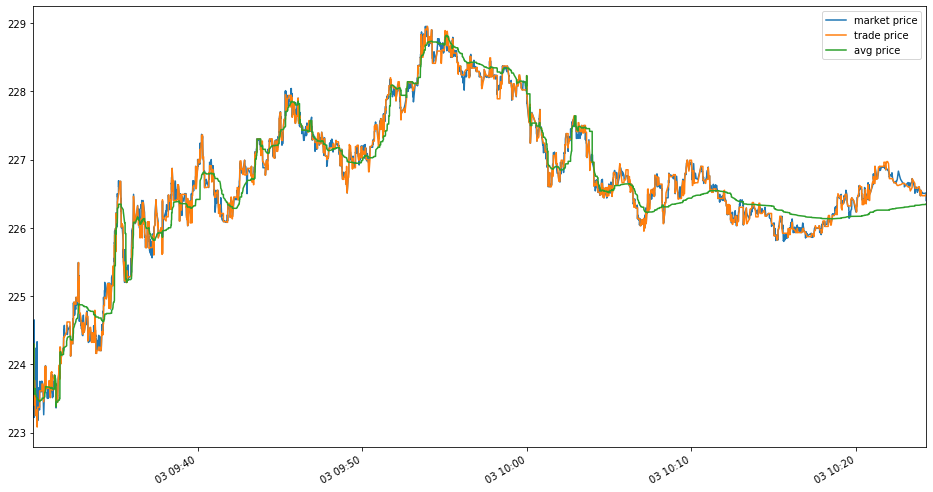

In [362]:
results['market_price'].plot(label='market price')
results['trade_price'].plot(label='trade price')
results['avg_price'].plot(label='avg price')
#results['fair_value'].plot(label='fair value')
plt.legend()
plt.show()

## 2. Output

In [298]:
statistical_results = tk.trade_statistics( results )

In [ ]:
# P&L Series

intraday_pnl = statistical_results['PNL']
intraday_pnl

In [ ]:
# max Long, max Short, Ending Position
# Final, Max, Min P&L

for key in list(statistical_results.keys())[1:]:
    print(key , ':' , statistical_results[key])

## 3. Explore Different Calibrations

In [350]:
def sigmoid(x):
    return 2/(1 + np.exp(-x)) - 1

In [351]:
sigmoid(-10000)

-1.0

## 4. Risk Adjustment

In [ ]:
results_adj = tk.algo_loop( taq.iloc[:100000], risk_adj=1, risk_denominator=10000 )

2019-10-31 01:42:54:170750: Beginning Tick Strategy run
Average stock spread for sample: 1.2193
2019-10-31 01:42:54:263862: starting main loop


In [368]:
results_adj 

,tick,risk,fair_value,market_price,trade_price,avg_price,position,unrealized_pnl,realized_pnl,trade_shares,trade_type,trade_side
2019-09-03 09:30:01.063247262,-1,0,223.972,224.05,224,224,-1,0,0,1,Agg,s
2019-09-03 09:30:01.823003996,-1,-0.00559994,224.1,224,224,224,0,-0,0,1,Pas,b
2019-09-03 09:30:02.140420818,1,0,224.315,224.28,224.3,224.3,1,0,0,1,Agg,b
2019-09-03 09:30:02.306131843,-1,0.00560744,223.962,224,224,224.3,0,-0.3,-0.3,1,Agg,s
2019-09-03 09:30:02.306257436,-1,0,223.868,224,224,224,1,0,-0.3,1,Pas,b
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03 10:24:16.588044857,-1,-0.0678428,226.249,226.49,226.49,226.49,-13,0.00580606,41.8858,1,Agg,s
2019-09-03 10:24:16.588417221,-1,-0.0734767,226.198,226.47,226.49,226.49,-14,0.265806,41.8858,1,Agg,s
2019-09-03 10:24:16.589011048,-1,-0.079106,226.119,226.46,226.49,226.49,-15,0.425806,41.8858,1,Agg,s
2019-09-03 10:24:16.590415434,-1,-0.0847303,226.107,226.43,226.49,226.49,-16,0.905806,41.8858,1,Agg,s


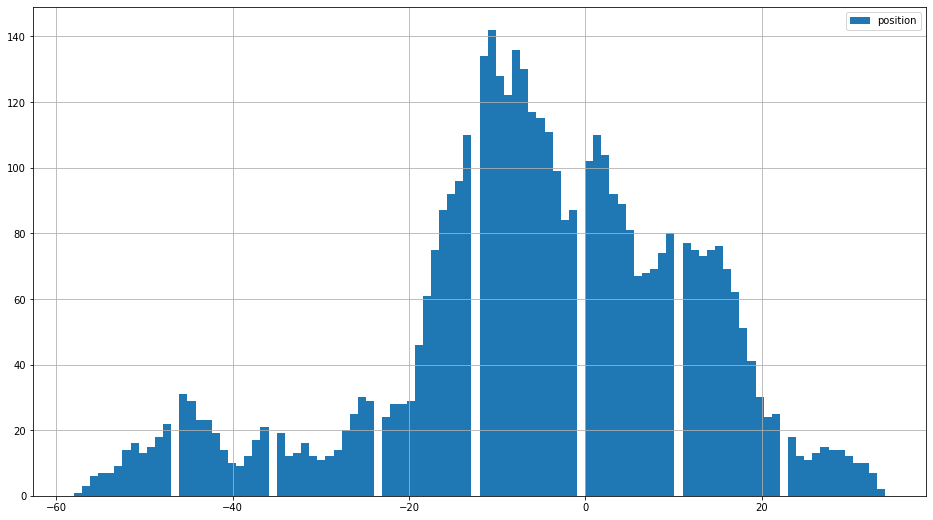

In [369]:
#results['market_price'].plot(label='market price')
#results['trade_price'].plot(label='trade price')
#results['avg_price'].plot(label='avg price')
results_adj['position'].hist(bins=100, label='position')
plt.legend()
plt.show()

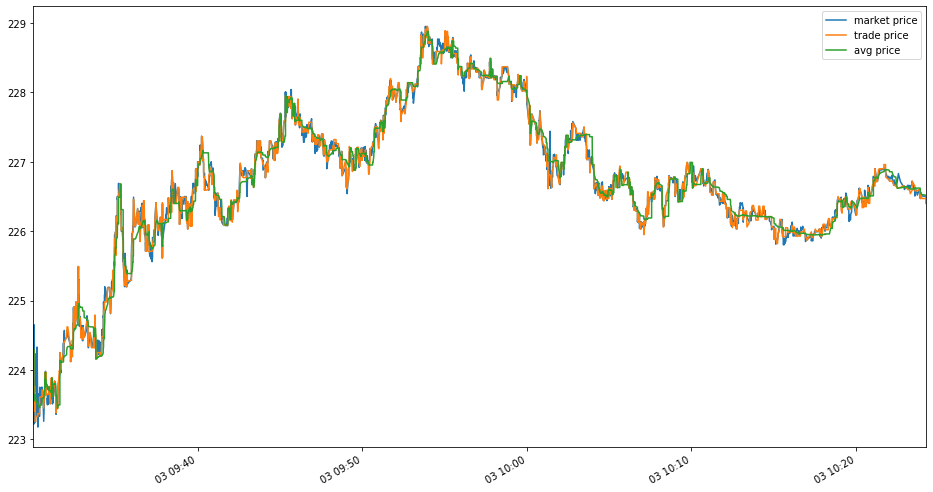

In [366]:
results_adj['market_price'].plot(label='market price')
results_adj['trade_price'].plot(label='trade price')
results_adj['avg_price'].plot(label='avg price')
#results['fair_value'].plot(label='fair value')
plt.legend()
plt.show()